<a href="https://colab.research.google.com/github/AnamAtr/Titanic-Dataset-Data-Cleaning-and-Preprocessing/blob/main/Data_cleaning_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
summary=df.describe()
print(summary)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
df['Survived'] = df['Survived'].replace({0: 'No', 1: 'Yes'})
df[['PassengerId', 'Survived']].head()

,PassengerId,Survived
0,1,No
1,2,Yes
2,3,Yes
3,4,Yes
4,5,No


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Survived').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='PassengerId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Survived')):
  _plot_series(series, series_name, i)
  fig.legend(title='Survived', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['PassengerId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'PassengerId'}, axis=1)
              .sort_values('PassengerId', ascending=True))
  xs = counted['PassengerId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Survived')):
  _plot_series(series, series_name, i)
  fig.legend(title='Survived', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Survived'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Survived', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Survived'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='PassengerId', y='Survived', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Replace Pclass values with descriptive labels
df['Pclass'] = df['Pclass'].replace({
    1: 'First Class',
    2: 'Second Class',
    3: 'Third Class'
})

# Display updated values
df[['PassengerId', 'Pclass']].head()


,PassengerId,Pclass
0,1,Third Class
1,2,First Class
2,3,Third Class
3,4,First Class
4,5,Third Class


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Handle missing value
#AGE
from sklearn.impute import SimpleImputer # import SimpleImputer here
age_imputer=SimpleImputer(strategy='median')
df['Age']=age_imputer.fit_transform(df[['Age']]) #Correcting typo here: fit_tranform to fit_transform

In [ ]:
df.head(14)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,No,Third Class,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,No,First Class,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,No,Third Class,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,Yes,Third Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,Yes,Second Class,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Cabin
# Check if 'Cabin' column exists before dropping
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'],inplace=True) # Changed 'column' to 'columns'
else:
    print("Column 'Cabin' is already dropped")  #If the code is executed again to remind user.

embarked_imputer =SimpleImputer(strategy='most_frequent')
# Reshape the output to a 1D array
df['Embarked']=embarked_imputer.fit_transform(df[['Embarked']]).ravel()
df.head()

Column 'Cabin' is already dropped


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,Third Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Yes,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Yes,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Yes,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,No,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Now use the instance for encoding
df['Sex'] = encoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,No,Third Class,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,Yes,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,Yes,Third Class,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,Yes,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,No,Third Class,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


In [ ]:
df.to_csv("Titanic_cleaned_data.csv",index=False)

In [ ]:
# Normalization
scaler = StandardScaler()
numerical_col=['Age','Fare','SibSp','Parch']
df[numerical_col]=scaler.fit_transform(df[numerical_col])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,No,Third Class,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,False,True
1,2,Yes,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,0.432793,-0.473674,PC 17599,0.786845,False,False
2,3,Yes,Third Class,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,True
3,4,Yes,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,False,True
4,5,No,Third Class,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,False,True


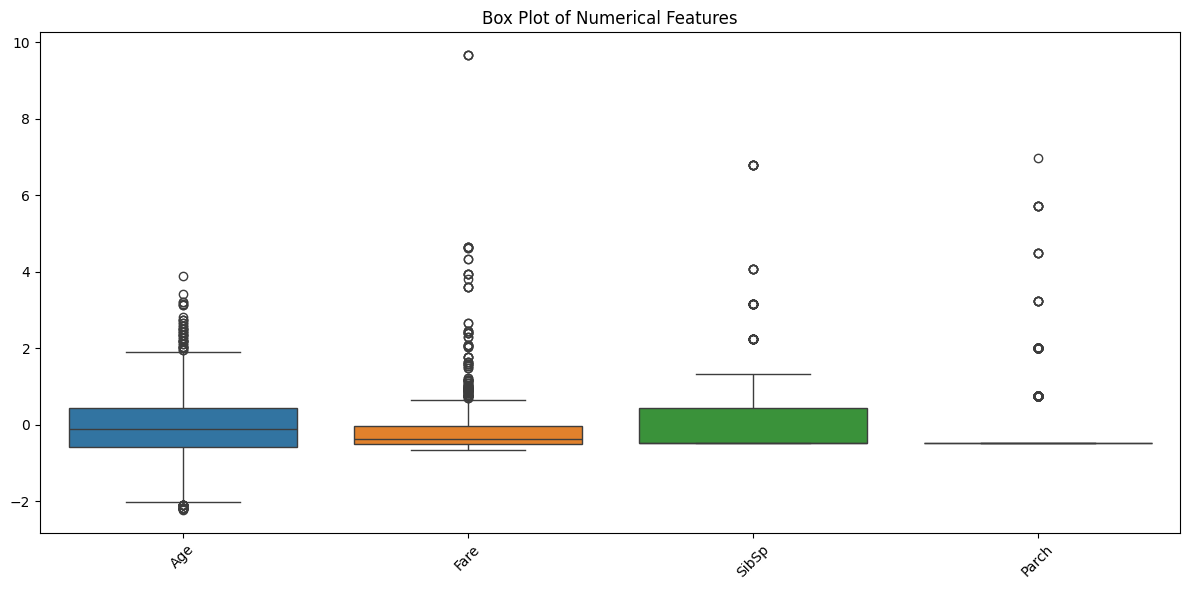

In [ ]:
#REMOVE OUTLIER
plt.figure(figsize=(12,6)) # Moved 'figuresize' inside 'figsize' parameter
sns.boxplot(data=df[numerical_col]) # Changed numerical_cols to numerical_col
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,No,Third Class,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,False,True
1,2,Yes,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,0.432793,-0.473674,PC 17599,0.786845,False,False
2,3,Yes,Third Class,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,True
3,4,Yes,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,False,True
4,5,No,Third Class,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,False,True


In [ ]:
df.to_csv("cleaned_data.csv",index=False)